## 1. Load the Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [35]:
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

In [39]:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix

In [6]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [8]:
#read in files - full dataset - no reduced columns 
df = pd.read_csv('data/application_clean.csv')  #application.csv (no column reduction)
df_red = pd.read_csv('data/REDUCED_application_clean.csv') #application dataframs with reduced columns 
df_eng = pd.read_csv('data/application_bureau.csv') #application data combined added features from burea dataframe

#delete "unnamed:0" column from all dataframes
df.drop('Unnamed: 0', axis=1, inplace=True)
df_red.drop('Unnamed: 0', axis=1, inplace=True)
df_eng.drop('Unnamed: 0', axis=1, inplace=True)

print(df.shape)
print(df_red.shape)
print(df_eng.shape)

(307216, 122)
(307216, 53)
(307216, 87)


## 2. Data Preprocessing

### 2.1 Application Data - without column reduction or feature engineering

In [85]:
#call function to preprocess data
df_s = preprocess(df)
print(df_s.shape)

#call function to balance data
X_balance, y_balance = balance_data(df_s) 
print('BALANCED: ' + str(X_balance.shape) + ' ' + str(y_balance.shape))

dfo SHape:
(307216, 16)

df_s SHape:
(307216, 106)

flags SHape:
(307216, 6)

df_s SHape (after dropping flags):
(307216, 100)

df_s SHape - after dropping SK_ID_CURR:
(307216, 99)

df_s SHape - after dropping target:
(307216, 98)

AFTER imputing: 
(307216, 98)

df_scaled SHape - after scaling:
(307216, 98)

df_scaled SHape - after adding ID:
(307216, 99)

df_scaled SHape - after adding dfo:
(307216, 237)

df_scaled SHape - after adding flags:
(307216, 243)

df_scaled SHape - after adding TARGET:
(307216, 244)

(307216, 244)
TARGET values before undersampling: 
0    282412
1     24804
Name: TARGET, dtype: int64
BALANCED: (49608, 243) (49608,)


In [73]:
import statsmodels.api as sm #used for statistical computations: descriptive statistics, estimation and inference
from statsmodels.graphics.api import abline_plot # provides the ability to do regression plots
from sklearn.metrics import mean_squared_error, r2_score # Classification metrics, implements several loss, score, and utility functions to measure classification performance. 
from sklearn.model_selection import train_test_split #  Provides train/test indices to split data in train/test sets
from sklearn import linear_model, preprocessing #LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares
import warnings # For handling error messages.

In [74]:
# Create constants for X, so the model knows its bounds
X_balance = sm.add_constant(X_balance)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_balance, y_balance, test_size=0.25, random_state=123)

# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel3 = sm.OLS(y_train, X_train)

# Fit the model
rModel3_results = rModel3.fit()
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     37.49
Date:                Thu, 23 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:27:03   Log-Likelihood:                -23165.
No. Observations:               37206   AIC:                         4.678e+04
Df Residuals:                   36979   BIC:                         4.872e+04
Df Model:                         226                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
CNT_CHILDREN                                          0.0366      0.034      1.081      0.280      -0.030       0.103
AMT_INCOME_TOTAL                                     -0.6914      2.348     -0.294      0.768      -5.294       3.911
AMT_CREDIT                                            2.1099      0.154     13.691      0.000       1.808       2.412
AMT_ANNUITY                                           0.3430      0.074      4.662      0.000       0.199       0.487
AMT_GOODS_PRICE                                      -2.3988      0.171    -14.005      0.000      -2.735      -2.063
REGION_POPULATION_RELATIVE                            0.0365      0.016      2.304      0.021       0.005       0.068
AGE                                                  -0.0004      0.016     -0.025      0.980      -0.031       0.031
YEARS_EMPLOYED                                       -0.2117      0.024     -8.725      0.000      -0.259      -0.164
YEARS_REGISTRATION                                   -0.0450      0.018     -2.446      0.014      -0.081      -0.009
YEARS_ID_PUBLISH                                     -0.0770      0.012     -6.435      0.000      -0.100      -0.054
OWN_CAR_AGE                                           0.0952      0.031      3.042      0.002       0.034       0.156
CNT_FAM_MEMBERS                                       0.0463      0.034      1.374      0.169      -0.020       0.112
REGION_RATING_CLIENT                                 -0.0315      0.031     -1.025      0.305      -0.092       0.029
REGION_RATING_CLIENT_W_CITY                           0.1175      0.031      3.787      0.000       0.057       0.178
HOUR_APPR_PROCESS_START                               0.0010      0.018      0.057      0.954      -0.034       0.036
REG_REGION_NOT_LIVE_REGION                           -0.0168      0.031     -0.540      0.589      -0.078       0.044
REG_REGION_NOT_WORK_REGION                           -0.0041      0.033     -0.123      0.902      -0.069       0.061
LIVE_REGION_NOT_WORK_REGION                          -0.0160      0.033     -0.485      0.628      -0.081       0.049
REG_CITY_NOT_LIVE_CITY                                0.0272      0.013      2.149      0.032       0.002       0.052
REG_CITY_NOT_WORK_CITY                                0.0088      0.014      0.619      0.536      -0.019       0.037
LIVE_CITY_NOT_WORK_CITY                              -0.0118      0.014     -0.857      0.392      -0.039       0.015
EXT_SOURCE_1                                         -0.2392      0.018    -13.605      0.000      -0.274      -0.205
EXT_SOURCE_2                                         -0.3601      0.011    -33.531      0.000      -0.381      -0.339
EXT_SOURCE_3   

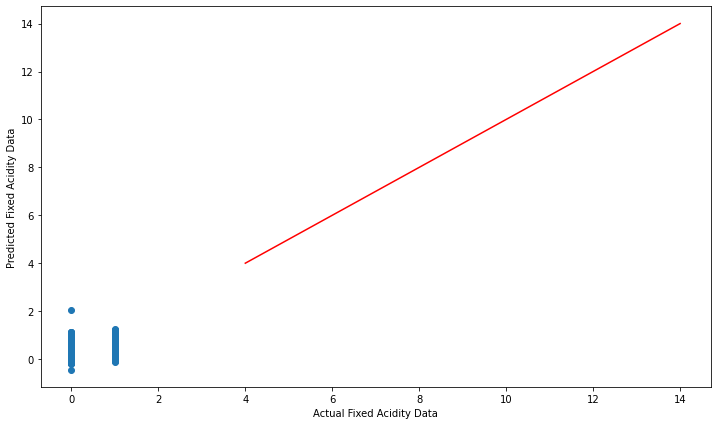

In [75]:
# Use our new model to make predictions
y_pred = rModel3_results.predict(X_test)
# Plot the predictions
# Build a scatterplot
_ = plt.figure(figsize=(12,7))
_ = plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(4,15)],[x for x in range(4,15)], color='red')

# Label it nicely
_ = plt.xlabel('Actual Fixed Acidity Data')
_ = plt.ylabel('Predicted Fixed Acidity Data')

#### GRADIENT BOOST

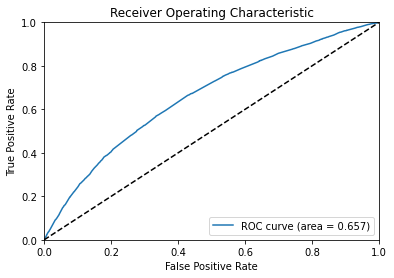

Confusion Matrix:
[[4678 2650]
 [3069 4486]]
Accuracy score (training): 0.619
Accuracy score (validation): 0.616
Accuracy: 0.616


In [86]:
cnf_matrix, ac_train, ac_val, accuracy = GB_model(X_balance, y_balance)
#print('Classification Report: ')
#print(classification_report)

print('Confusion Matrix:')
print(cnf_matrix)

print("Accuracy score (training): {0:.3f}".format(ac_train))
print("Accuracy score (validation): {0:.3f}".format(ac_val))
print("Accuracy: {}".format(accuracy))

#### Random Forest

Training Shape: (34725, 243)
Testing Shape: (14883, 243)
Random Forest: Accuracy=0.679
Random Forest: f1-score=0.679
Confusion Matrix:
[[5120 2208]
 [2565 4990]]
30


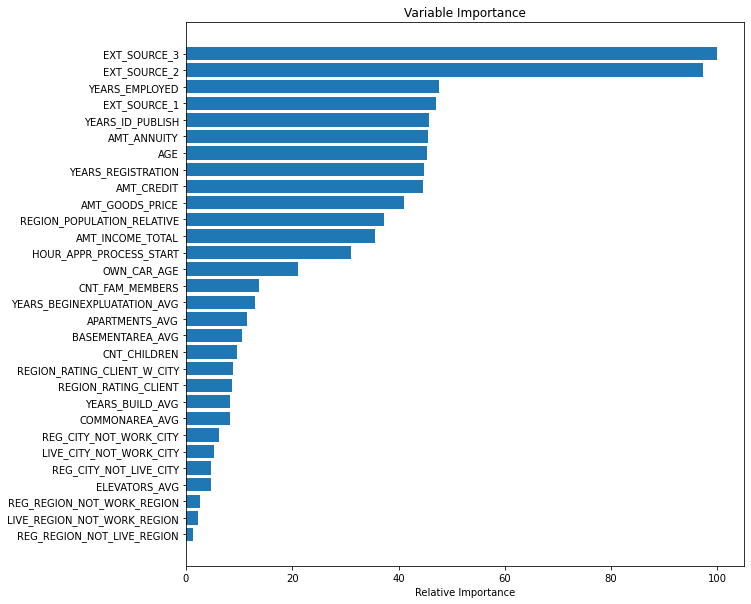

In [65]:
RF_model(X_balance, y_balance)

### 2.2 Modeling with reduced columns

In [83]:
#call function to preprocess data
df_s = preprocess(df_red)
print(df_s.shape)

#call function to balance data
X_balance, y_balance = balance_data(df_s) 
print('BALANCED: ' + str(X_balance.shape) + ' ' + str(y_balance.shape))

dfo SHape:
(307216, 12)

df_s SHape:
(307216, 41)

flags SHape:
(307216, 6)

df_s SHape (after dropping flags):
(307216, 35)

df_s SHape - after dropping SK_ID_CURR:
(307216, 34)

df_s SHape - after dropping target:
(307216, 33)

AFTER imputing: 
(307216, 33)

df_scaled SHape - after scaling:
(307216, 33)

df_scaled SHape - after adding ID:
(307216, 34)

df_scaled SHape - after adding dfo:
(307216, 156)

df_scaled SHape - after adding flags:
(307216, 162)

df_scaled SHape - after adding TARGET:
(307216, 163)

(307216, 163)
TARGET values before undersampling: 
0    282412
1     24804
Name: TARGET, dtype: int64
BALANCED: (49608, 162) (49608,)


#### Linear Regression

In [77]:
# Create constants for X, so the model knows its bounds
X_balance = sm.add_constant(X_balance)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_balance, y_balance, test_size=0.25, random_state=123)

# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel3 = sm.OLS(y_train, X_train)

# Fit the model
rModel3_results = rModel3.fit()
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     55.11
Date:                Thu, 23 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:00:36   Log-Likelihood:                -23302.
No. Observations:               37206   AIC:                         4.690e+04
Df Residuals:                   37057   BIC:                         4.817e+04
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
CNT_CHILDREN                                         -0.0158      0.034     -0.470      0.639      -0.082       0.050
AMT_INCOME_TOTAL                                     -2.6925      3.736     -0.721      0.471     -10.015       4.630
AMT_CREDIT                                            1.9915      0.153     13.003      0.000       1.691       2.292
AMT_ANNUITY                                           0.5071      0.075      6.779      0.000       0.360       0.654
AMT_GOODS_PRICE                                      -2.3873      0.170    -14.031      0.000      -2.721      -2.054
REGION_POPULATION_RELATIVE                            0.0186      0.015      1.210      0.226      -0.012       0.049
AGE                                                   0.0045      0.016      0.284      0.777      -0.026       0.035
YEARS_EMPLOYED                                       -0.2114      0.024     -8.715      0.000      -0.259      -0.164
YEARS_REGISTRATION                                   -0.0433      0.018     -2.359      0.018      -0.079      -0.007
YEARS_ID_PUBLISH                                     -0.0672      0.012     -5.630      0.000      -0.091      -0.044
CNT_FAM_MEMBERS                                      -0.0092      0.034     -0.275      0.784      -0.075       0.056
REGION_RATING_CLIENT                                 -0.0389      0.031     -1.246      0.213      -0.100       0.022
REGION_RATING_CLIENT_W_CITY                           0.1186      0.032      3.760      0.000       0.057       0.180
HOUR_APPR_PROCESS_START                              -0.0076      0.018     -0.430      0.667      -0.042       0.027
LIVE_REGION_NOT_WORK_REGION                          -0.0074      0.013     -0.588      0.557      -0.032       0.017
REG_CITY_NOT_LIVE_CITY                                0.0260      0.012      2.097      0.036       0.002       0.050
REG_CITY_NOT_WORK_CITY                                0.0071      0.014      0.509      0.611      -0.020       0.034
LIVE_CITY_NOT_WORK_CITY                              -0.0002      0.014     -0.014      0.989      -0.027       0.027
EXT_SOURCE_1                                         -0.2491      0.018    -14.122      0.000      -0.284      -0.215
EXT_SOURCE_2                                         -0.3646      0.011    -33.930      0.000      -0.386      -0.344
EXT_SOURCE_3                                         -0.5075      0.012    -42.786      0.000      -0.531      -0.484
OBS_30_CNT_SOCIAL_CIRCLE                              3.1636      6.088      0.520      0.603      -8.770      15.097
DEF_30_CNT_SOCIAL_CIRCLE                              0.9474      0.337      2.811      0.005       0.287       1.608
OBS_60_CNT_SOCI

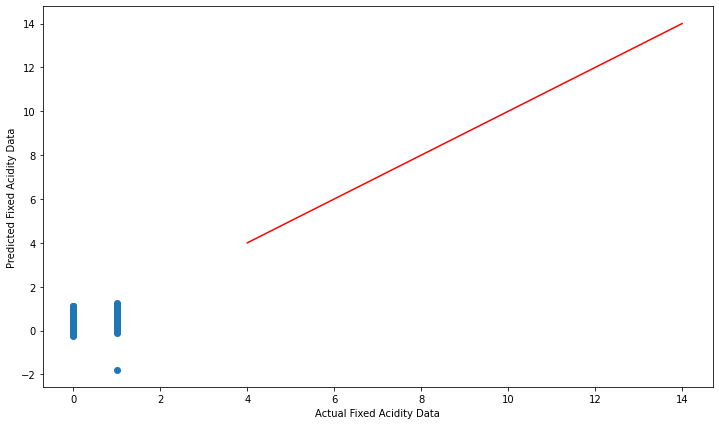

In [78]:
# Use our new model to make predictions
y_pred = rModel3_results.predict(X_test)
# Plot the predictions
# Build a scatterplot
_ = plt.figure(figsize=(12,7))
_ = plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(4,15)],[x for x in range(4,15)], color='red')

# Label it nicely
_ = plt.xlabel('Actual Fixed Acidity Data')
_ = plt.ylabel('Predicted Fixed Acidity Data')

#### Gradient Boost

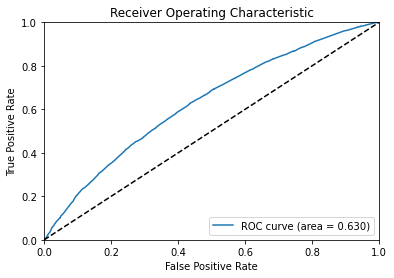

Confusion Matrix:
[[4444 2884]
 [3157 4398]]
Accuracy score (training): 0.599
Accuracy score (validation): 0.594
Accuracy: 0.594


In [84]:
cnf_matrix, ac_train, ac_val, accuracy = GB_model(X_balance, y_balance)
#print('Classification Report: ')
#print(classification_report)

print('Confusion Matrix:')
print(cnf_matrix)

print("Accuracy score (training): {0:.3f}".format(ac_train))
print("Accuracy score (validation): {0:.3f}".format(ac_val))
print("Accuracy: {}".format(accuracy))

#### Random Forest

Training Shape: (34725, 162)
Testing Shape: (14883, 162)
Random Forest: Accuracy=0.682
Random Forest: f1-score=0.682
Confusion Matrix:
[[5056 2272]
 [2457 5098]]
30


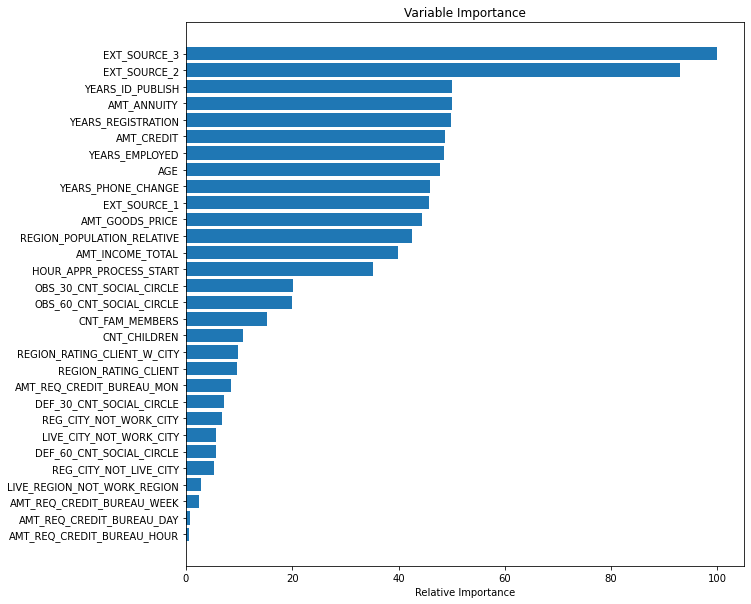

In [68]:
RF_model(X_balance, y_balance)

## Random Forest Classifier

In [38]:
def RF_model(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    print("Training Shape: " + str(X_train.shape))
    print("Testing Shape: " + str(X_test.shape))
    random_forest = RandomForestClassifier(n_estimators=1000, random_state=1, n_jobs=-1)
    model = random_forest.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    lr_probs = y_pred_prob[:,1]
    #ac = accuracy_score(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print('Random Forest: Accuracy=%.3f' % (ac))
    print('Random Forest: f1-score=%.3f' % (f1))
    print('Confusion Matrix:')
    print(cm)
    
    feature_importance = random_forest.feature_importances_

    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
    sorted_idx = np.argsort(feature_importance)[:30]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

## Gardient Boosting Classifier

In [55]:
def best_params(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    
    gb = GradientBoostingClassifier()
    parameters = {
    "n_estimators":[5,50,100],
    "max_depth":[3,5,7],
    "learning_rate":[1,10,50]
    }
    
    from sklearn.model_selection import GridSearchCV
    cv = GridSearchCV(gb,parameters,cv=5)
    cv.fit(X_train, y_train.values.ravel())
    
    print(cv.best_params_)
   
    #learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
    #for learning_rate in learning_rates:
     #   gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
      #  gb.fit(X_train, y_train)
       # print("Learning rate: ", learning_rate)
        #print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
        #print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
        #print()


In [81]:
def GB_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    gb_model = GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_features=5, max_depth=3, random_state=0)
    gb_model.fit(X_train, y_train)

    y_pred = gb_model.predict(X_test)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    #print('Confusion Matrix')
    ac_train = gb_model.score(X_train, y_train)
    ac_val = gb_model.score(X_test, y_test)
    accuracy = round((y_pred==y_test).sum()/len(y_pred),3)
    
    y_true = y_test # ground truth labels
    y_probas = gb_model.predict_proba(X_test)  # predicted probabilities generated by sklearn classifier
    probs = y_probas[:,1]
    # Calculate fpr, tpr, thresholds and roc_auc
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = roc_auc_score(y_test, probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return(cnf_matrix, ac_train, ac_val, accuracy)

    

   # print(classification_report(y_pred, y_test))

    #print("Accuracy score (training): {0:.3f}".format(gb_model.score(X_train, y_train)))
    #print("Accuracy score (validation): {0:.3f}".format(gb_model.score(X_test, y_test)))
    #print("Accuracy: {}".format(round((y_pred==y_test).sum()/len(y_pred),3)))

In [41]:

y_true = y_test # ground truth labels
y_probas = gb_model.predict_proba(X_test)  # predicted probabilities generated by sklearn classifier
probs = y_probas[:,1]
# Calculate fpr, tpr, thresholds and roc_auc
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: name 'y_test' is not defined

In [64]:
def balance_data(df):
    #under sample imbalanced data - reduce rows with TARGET=0
    from imblearn.under_sampling import RandomUnderSampler

    df_train = df    
    print('TARGET values before undersampling: ')
    print(df_train.TARGET.value_counts())

    X = df_train.drop('TARGET', axis = 1)
    y = df_train['TARGET']

    rus = RandomUnderSampler()
    X_rus, y_rus = rus.fit_resample(X, y)
    
    #from imblearn.combine import SMOTEENN
    #smote_enn = SMOTEENN(random_state=0)
    #X_resampled, y_resampled = smote_enn.fit_resample(X, y)
    #print(sorted(Counter(y_resampled).items()))
    
    #from imblearn.combine import SMOTETomek
    #smote_tomek = SMOTETomek(random_state=0)
    #X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
    #print(sorted(Counter(y_resampled).items()))
    
    return X_rus, y_rus
    #print('Removed indexes:', id_rus)

    #plot_2d_space(X_rus, y_rus, 'Random under-sampling')


In [63]:
def preprocess(df):
    
    #create dataframe to hold all features that are categories (datatype object)
    dfo=df.select_dtypes(include=['object']) # select object type columns
    ##dfo_test =  df_test.select_dtypes(include=['object'])
    #df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
    #dfo = pd.get_dummies(dfo)
    print('dfo SHape:')
    print(dfo.shape)
    #print(dfo_test.shape)
    print('') 
    
    #create a dataframe to hold only numeric values - this dataset will be used to impute the mean and scale the data
    df_s = df.drop(dfo, axis=1)
    ##df_s_test = df_test.drop(dfo_test, axis=1)
    print('df_s SHape:')
    print(df_s.shape)
    ##print(df_s_test.shape)
    print('')
    
    #create new dataframe to hold flag columns  
    col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL']
         # 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
          # 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
           #'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
           #'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
           #'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17', 
           #'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
    flags = df_s[col]
    ##flags_test = df_s_test[col]
    print('flags SHape:')
    print(flags.shape)
    ##print(flags_test.shape)
    print('')

    #drop flag columns from df_s and df_s_ testsince they don't need to be scaled
    df_s = df_s.drop(col, axis=1)
    ##df_s_test = df_s_test.drop(col, axis=1)
    print('df_s SHape (after dropping flags):')
    print(df_s.shape)
    ##print(df_s_test.shape)
    print('')

    ID = df_s['SK_ID_CURR']
    ##ID_test = df_s_test['SK_ID_CURR']

    df_s.drop(columns=['SK_ID_CURR'], inplace=True)
    ##df_s_test.drop(columns=['SK_ID_CURR'], inplace=True)
    print('df_s SHape - after dropping SK_ID_CURR:')
    print(df_s.shape)
    ##print(df_s_test.shape)
    print('')
    
    #remove 'TARGET' cloumn from dataframe while scaling and imputing in order to avoid data leakage 
    target = df_s['TARGET']
    df_s.drop(columns=['TARGET'], inplace=True)
    print('df_s SHape - after dropping target:')
    print(df_s.shape)
    ##print(df_s_test.shape)
    print('')    
    
    #store column names so we can use them to convert array to dataframe
    names = df_s.columns
    #names_test = df_s_test.columns
    
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

    scaled = imputer.fit_transform(df_s)
    #scaled_test = imputer.transform(df_s_test)

    print('AFTER imputing: ')
    df_s = pd.DataFrame(scaled, columns = names)
    print(df_s.shape)

    ##df_s_test = pd.DataFrame(scaled_test, columns = names)
    ##print(df_s_test.shape)
    print('')
    
    from sklearn.preprocessing import MinMaxScaler

    # define min max scaler
    scaler = MinMaxScaler()

    # transform data
    scaled = scaler.fit_transform(df_s)
    ##scaled_test = scaler.transform(df_s_test)

    #convert array to dataframe
    df_scaled = pd.DataFrame(scaled, columns=names)
    ##df_scaled_t = pd.DataFrame(scaled_test, columns=names)
    
    print('df_scaled SHape - after scaling:')
    print(df_scaled.shape)
    ##print(df_scaled_t.shape)
    print('')
    
    df_scaled['SK_ID_CURR'] = ID
    ##df_scaled_t['SK_ID_CURR'] = ID_test
    print('df_scaled SHape - after adding ID:')
    print(df_scaled.shape)
    ##print(df_scaled_t.shape)
    print('')
    
    dfo = pd.get_dummies(dfo)
    ##dfo_test = pd.get_dummies(dfo_test)

    ##dfo, dfo_test = dfo.align(dfo_test, join = 'inner', axis = 1)

    df_scaled = pd.concat([df_scaled, dfo], axis=1)
    ##df_scaled_t = pd.concat([df_scaled_t, dfo_test], axis=1)
    print('df_scaled SHape - after adding dfo:')
    print(df_scaled.shape)
    ##print(df_scaled_t.shape)
    print('')
    
    
    df_scaled = pd.concat([df_scaled, flags], axis=1)
    #df_scaled_t = pd.concat([df_scaled_t, flags_test], axis=1)
    print('df_scaled SHape - after adding flags:')
    print(df_scaled.shape)
    ##print(df_scaled_t.shape)
    print('')
    
    df_scaled['TARGET'] = target
    print('df_scaled SHape - after adding TARGET:')
    print(df_scaled.shape)
    ##print(df_scaled_t.shape)
    print('')
    
    return df_scaled
    